# MAIN PIPELINE
*note everything has to be run from the top to bottom in order to work

#EXPLORATORY DATA ANALYSIS



In [ ]:

%pip install scikit-lego

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score


pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

In [ ]:
# Load Dataset
laptop_prices_raw = pd.read_csv('laptop_prices.csv', index_col=0)

In [ ]:
# Dataset Exploration
laptop_prices_raw

,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
Company,,,,,,,,,,,,,,,,,,,,,,
Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,1080,Yes,Yes,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,1800,Yes,Yes,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics


In [ ]:
laptop_prices_raw.head(20)

,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
Company,,,,,,,,,,,,,,,,,,,,,,
Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
Acer,Aspire 3,Notebook,15.6,4,Windows 10,2.10,400.00,Standard,1366,768,No,No,No,AMD,3.0,A9-Series 9420,500,0,HDD,No,AMD,Radeon R5
Apple,MacBook Pro,Ultrabook,15.4,16,Mac OS X,2.04,2139.97,Standard,2880,1800,No,Yes,Yes,Intel,2.2,Core i7,256,0,Flash Storage,No,Intel,Iris Pro Graphics
Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,1158.70,Standard,1440,900,No,No,No,Intel,1.8,Core i5,256,0,Flash Storage,No,Intel,HD Graphics 6000
Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,1.30,1495.00,Full HD,1920,1080,No,No,No,Intel,1.8,Core i7 8550U,512,0,SSD,No,Nvidia,GeForce MX150


In [ ]:
laptop_prices_raw.sample(20)

,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
Company,,,,,,,,,,,,,,,,,,,,,,
HP,EliteBook 840,Ultrabook,14.0,8,Windows 7,1.54,1870.0,Full HD,1920,1080,No,No,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
Lenovo,Legion Y720-15IKB,Gaming,15.6,8,Windows 10,3.20,1399.0,Full HD,1920,1080,No,Yes,No,Intel,2.8,Core i7 7700HQ,256,1024,SSD,HDD,Nvidia,GeForce GTX 1060
Dell,Latitude 5580,Notebook,15.6,4,Windows 10,1.90,825.0,Standard,1366,768,No,No,No,Intel,2.5,Core i5 7200U,500,0,HDD,No,Intel,HD Graphics 620
Dell,Inspiron 5379,2 in 1 Convertible,13.3,16,Windows 10,1.62,1279.0,Full HD,1920,1080,Yes,No,No,Intel,1.8,Core i7 8550U,512,0,SSD,No,Intel,UHD Graphics 620
Lenovo,ThinkPad E570,Notebook,15.6,4,Windows 10,2.30,565.0,Standard,1366,768,No,No,No,Intel,2.0,Core i3 6006U,128,0,SSD,No,Intel,HD Graphics 520
Acer,Aspire E5-575,Notebook,15.6,6,Windows 10,2.23,549.0,Standard,1366,768,No,No,No,Intel,2.5,Core i5 7200U,1024,0,HDD,No,Intel,HD Graphics 620
Dell,XPS 13,Ultrabook,13.3,16,Windows 10,1.20,2254.0,Quad HD+,3200,1800,Yes,No,No,Intel,2.7,Core i7 7500U,1024,0,SSD,No,Intel,HD Graphics 620
Acer,Nitro 5,Gaming,15.6,8,Windows 10,2.70,1260.0,Full HD,1920,1080,No,Yes,No,Intel,2.8,Core i7 7700HQ,128,1024,SSD,HDD,Nvidia,GeForce GTX 1050
Lenovo,IdeaPad 310-15IKB,Notebook,15.6,8,No OS,2.20,685.0,Full HD,1920,1080,No,No,No,Intel,2.7,Core i7 7500U,1024,0,HDD,No,Nvidia,GeForce 920MX


In [ ]:
laptop_prices_raw.shape

(1275, 22)

In [ ]:
# Numerical Summary
laptop_prices_raw.select_dtypes('number').describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [ ]:
# Grouping by Company
laptop_prices_raw.groupby("Company")["Price_euros"].mean().sort_values(ascending=False)

,Price_euros
Company,
Razer,3346.142857
LG,2099.000000
MSI,1728.908148
Google,1677.666667
Microsoft,1612.308333
Apple,1564.198571
Huawei,1424.000000
Samsung,1413.444444
Toshiba,1267.812500


In [ ]:
# Count Duplicated Records
laptop_prices_raw.duplicated().sum()

0

In [ ]:
# Missing Values Check
missing_prop = laptop_prices_raw.isna().sum() / len(laptop_prices_raw.index)
missing_prop.sort_values()

,0
Product,0.0
SecondaryStorageType,0.0
PrimaryStorageType,0.0
SecondaryStorage,0.0
PrimaryStorage,0.0
CPU_model,0.0
CPU_freq,0.0
CPU_company,0.0
RetinaDisplay,0.0
IPSpanel,0.0


In [ ]:
#Visualize Price Distribution
fig = px.histogram(laptop_prices_raw, x='Price_euros', nbins=50, title='Distribution of Laptop Prices')
fig.show()

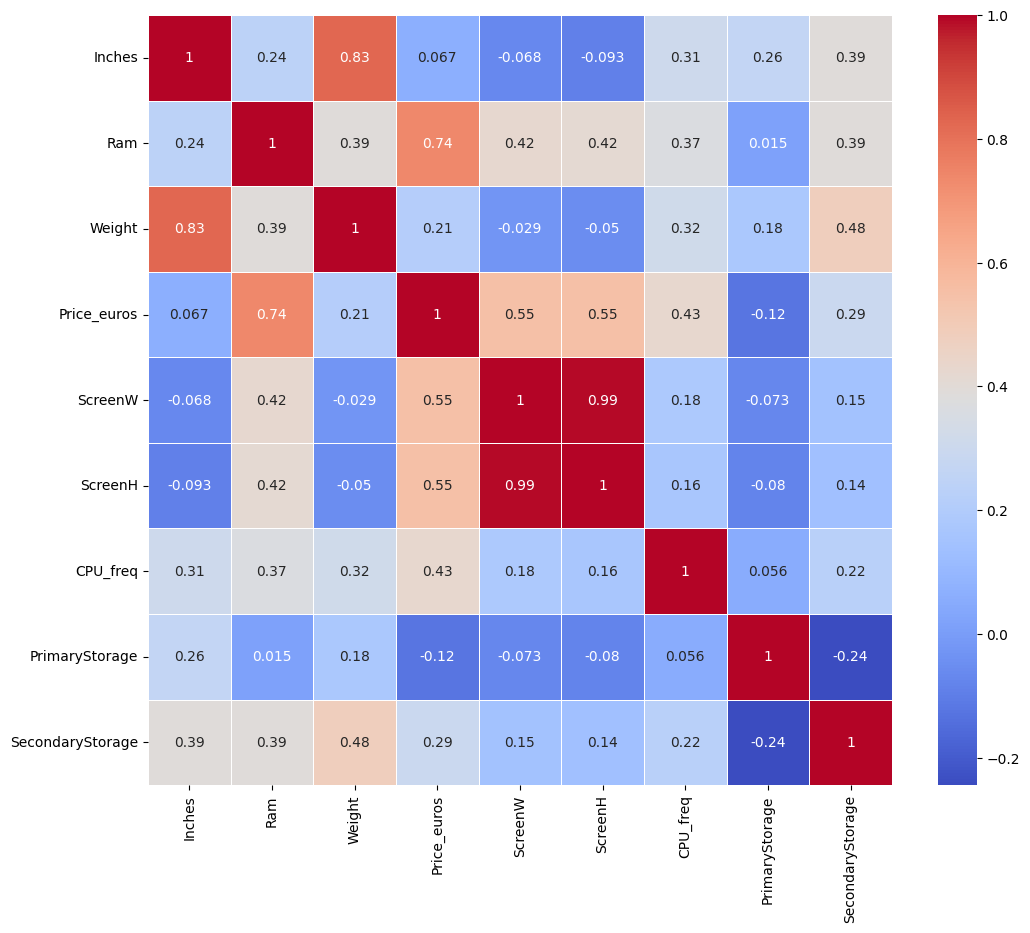

In [ ]:
#Correlation Heatmap
correlation_matrix = laptop_prices_raw.select_dtypes(include=np.number).corr() # Select only numerical features for correlation calculation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# DATA PREPROCESSING AND FEATURE ENGINEERING

Data Preprocessing

In [ ]:
# Encode Categorical Variables
# One-hot encoding categorical variables
laptop_prices_raw = pd.get_dummies(laptop_prices_raw, columns=
 ['OS', 'TypeName', 'Screen', 'PrimaryStorageType',
  'SecondaryStorageType', 'GPU_company', 'CPU_company'])


In [ ]:
# Convert boolean-like variables to binary
laptop_prices_raw['Touchscreen'] = laptop_prices_raw['Touchscreen'].map({'Yes': 1, 'No': 0})
laptop_prices_raw['IPSpanel'] = laptop_prices_raw['IPSpanel'].map({'Yes': 1, 'No': 0})
laptop_prices_raw['RetinaDisplay'] = laptop_prices_raw['RetinaDisplay'].map({'Yes': 1, 'No': 0})


Feature Engineering

In [ ]:
# Combine Screen Features: Create Screen Area and Drop Screen Width and Height
laptop_prices_raw['Screen_Area'] = laptop_prices_raw['ScreenW'] * laptop_prices_raw['ScreenH']
laptop_prices_raw.drop(columns=['ScreenW', 'ScreenH'], inplace=True)

In [ ]:
# Remove Redundant Features: Drop Inches
laptop_prices_raw.drop(columns=['Inches'], inplace=True)

In [ ]:
# Create Interaction Feature: RAM_CPU_Interaction
laptop_prices_raw['RAM_CPU_Interaction'] = laptop_prices_raw['Ram'] * laptop_prices_raw['CPU_freq']


In [ ]:
# Combine Storage Features: Total Storage
laptop_prices_raw['Total_Storage'] = laptop_prices_raw['PrimaryStorage'] + laptop_prices_raw['SecondaryStorage']
laptop_prices_raw.drop(columns=['PrimaryStorage'], inplace=True)
laptop_prices_raw.drop(columns=['SecondaryStorage'], inplace=True)

In [ ]:
# Assuming an exchange rate of 1 EUR = 1.10 USD
exchange_rate = 1.10
laptop_prices_raw['Price_usd'] = laptop_prices_raw['Price_euros'] * exchange_rate

In [ ]:
# Define price bins and labels for categories
bins = [0, 500, 1000, np.inf]
labels = ['Budget', 'Mid', 'Premium']

# Create price category column based on USD price
laptop_prices_raw['Price_Category'] = pd.cut(laptop_prices_raw['Price_usd'], bins=bins, labels=labels)


In [ ]:
# Drop unnecessary columns
laptop_prices_raw.drop(columns=['Product', 'CPU_model', 'GPU_model', 'Price_usd', 'Price_euros'], inplace=True)

In [ ]:
laptop_prices_raw

,Ram,Weight,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Screen_4K Ultra HD,Screen_Full HD,Screen_Quad HD+,Screen_Standard,PrimaryStorageType_Flash Storage,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_HDD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_AMD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia,CPU_company_AMD,CPU_company_Intel,CPU_company_Samsung,Screen_Area,RAM_CPU_Interaction,Total_Storage,Price_Category
Company,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apple,8,1.37,0,1,1,2.3,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,4096000,18.4,128,Premium
Apple,8,1.34,0,0,0,1.8,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,1296000,14.4,128,Mid
HP,8,1.86,0,0,0,2.5,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,2073600,20.0,256,Mid
Apple,16,1.83,0,1,1,2.7,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,5184000,43.2,512,Premium
Apple,8,1.37,0,1,1,3.1,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,4096000,24.8,256,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lenovo,4,1.80,1,1,0,2.5,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,2073600,10.0,128,Mid
Lenovo,16,1.30,1,1,0,2.5,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,5760000,40.0,512,Premium
Lenovo,2,1.50,0,0,0,1.6,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,1049088,3.2,64,Budget


In [ ]:
# Feature Scaling
scaler = StandardScaler()
numerical_features = ['Weight', 'CPU_freq', 'Ram', 'Screen_Area', 'Total_Storage', 'RAM_CPU_Interaction']
laptop_prices_raw[numerical_features] = scaler.fit_transform(laptop_prices_raw[numerical_features])


In [ ]:
# Save the processed DataFrame as 'laptop_prices_processed'
laptop_prices_processed = laptop_prices_raw.copy()

In [ ]:
# Train-Test Split
X = laptop_prices_processed.drop(columns=['Price_Category'])
y = laptop_prices_processed['Price_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# REGRESSION ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X = laptop_prices_processed.drop(columns=['Price_Category'])
y = laptop_prices_processed['Price_Category']
y = y.astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ls_area_fit = LinearRegression()
ls_area_fit.fit(X=np.array(X_train), y=y_train)

LinearRegression()

In [ ]:
ls_area_fit = LinearRegression()
ls_area_fit.fit(X=np.array(X_test), y=y_test)

LinearRegression()

In [ ]:
pred_train_df = pd.DataFrame(
    {'true': y_train,
     'ls_pred': ls_area_fit.predict(np.array(X_train))
    }
)
pred_train_df

,true,ls_pred
Company,,
Acer,1,1.729645
Razer,2,2.047705
Lenovo,1,1.317387
Dell,1,1.027053
HP,1,0.791291
...,...,...
HP,2,0.997274
Acer,1,1.721492
HP,1,1.238863


In [ ]:
# calculate the rMSE, MAE, MAD, correlation, and R2 of the true price with the LS and LAD predictions
print('LS rMSE:', np.sqrt(mean_squared_error(pred_train_df['true'], pred_train_df['ls_pred'])))
print('LS MAE:', mean_absolute_error(pred_train_df['true'], pred_train_df['ls_pred']))
print('LS MAD:', np.median(np.abs(pred_train_df['true'] - pred_train_df['ls_pred'])))
print('LS correlation:', np.corrcoef(pred_train_df['true'], pred_train_df['ls_pred'])[0, 1])
print('LS R2:', r2_score(pred_train_df['true'], pred_train_df['ls_pred']))

LS rMSE: 0.4226110077356965
LS MAE: 0.33582644314095605
LS MAD: 0.27537772922300774
LS correlation: 0.8140513702018194
LS R2: 0.6611160235351514


In [ ]:
pred_test_df = pd.DataFrame(
    {'true': y_test,
     'ls_pred': ls_area_fit.predict(np.array(X_test))
    }
)
pred_test_df

,true,ls_pred
Company,,
HP,1,0.752139
HP,1,1.349760
Lenovo,2,1.895304
Toshiba,2,1.227669
Dell,2,1.629615
...,...,...
Lenovo,0,1.092489
Dell,2,1.869934
Dell,2,1.974687


In [ ]:
# calculate the rMSE, MAE, MAD, correlation, and R2 of the true price with the LS and LAD predictions
print('LS rMSE:', np.sqrt(mean_squared_error(pred_test_df['true'], pred_test_df['ls_pred'])))
print('LS MAE:', mean_absolute_error(pred_test_df['true'], pred_test_df['ls_pred']))
print('LS MAD:', np.median(np.abs(pred_test_df['true'] - pred_test_df['ls_pred'])))
print('LS correlation:', np.corrcoef(pred_test_df['true'], pred_test_df['ls_pred'])[0, 1])
print('LS R2:', r2_score(pred_test_df['true'], pred_test_df['ls_pred']))

LS rMSE: 0.38834248987629666
LS MAE: 0.3093411436706044
LS MAD: 0.25386613387654433
LS correlation: 0.8168757425662153
LS R2: 0.6672859787931062


In [ ]:
#Regularization
#feature selection, brings predictors to 0 if not important

from sklearn.linear_model import Lasso
import numpy as np

In [ ]:
# Apply Lasso Regularization
l1 = Lasso(alpha=0.1)
l1.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
# Lasso Feature Importance
print(l1.coef_)  # Coefficients for each feature
print(l1.intercept_)  # Intercept

[ 0.15320337 -0.          0.          0.          0.          0.14812744
 -0.         -0.         -0.          0.         -0.          0.
 -0.          0.          0.          0.          0.         -0.
 -0.0608923   0.          0.         -0.          0.          0.
 -0.         -0.         -0.         -0.          0.14661322  0.
 -0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.         -0.          0.07410474  0.
 -0.        ]
1.3394661212137733


In [ ]:
import pandas as pd

# Create a DataFrame to show feature names and their Lasso coefficients
feature_names = X_train.columns
lasso_coefficients = l1.coef_

# Create a DataFrame of features and their Lasso coefficients
lasso_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients
})

# Filter out features with non-zero coefficients (retained by Lasso)
lasso_importance_df = lasso_importance_df[lasso_importance_df['Coefficient'] != 0]

# Display the retained features
print(lasso_importance_df)


                   Feature  Coefficient
0                      Ram     0.153203
5                 CPU_freq     0.148127
18       TypeName_Notebook    -0.060892
28  PrimaryStorageType_SSD     0.146613
40             Screen_Area     0.074105


# LOGISTIC ANALYSIS


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import label_binarize
import plotly.express as px

In [ ]:
# 1. Train-Test Split
X = laptop_prices_processed.drop(columns=['Price_Category'])
y = laptop_prices_processed['Price_Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 2. Train Logistic Regression Models with Regularization

# L1 Regularization (Lasso)
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', random_state=42)
lr_l1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



LogisticRegression(multi_class='ovr', penalty='l1', random_state=42,
                   solver='liblinear')

In [ ]:
# 3. Predictions for a Sample of Validation Data
val_sample_indices = X_val.sample(20).index  # Get indices of 20 random samples
X_val_sample = X_val.loc[val_sample_indices]
y_val_sample = y_val.loc[val_sample_indices]

In [ ]:
# Predict Probabilities and Classes for the Sample using L1 model
y_pred_prob_l1 = lr_l1.predict_proba(X_val_sample)  # Probabilities for each class
y_pred_class_l1 = lr_l1.predict(X_val_sample)       # Predicted classes

In [ ]:
# Create DataFrame to Compare True Values with Predictions
pred_val_sample = pd.DataFrame(dict(
    Price_Category=y_val_sample,           # True price categories
    lr_predict_class=y_pred_class_l1,      # Predicted class
    lr_predict_prob=[probs for probs in y_pred_prob_l1]  # Probabilities for each class (one row per sample)
))
# Display the DataFrame
print("Sample of Predictions vs True Categories:")
print(pred_val_sample)

Sample of Predictions vs True Categories:
        Price_Category lr_predict_class  \
Company                                   
Asus           Premium          Premium   
Asus           Premium              Mid   
Asus           Premium          Premium   
Asus               Mid          Premium   
Asus               Mid              Mid   
...                ...              ...   
Acer           Premium          Premium   
Acer               Mid          Premium   
Acer            Budget           Budget   
Acer            Budget           Budget   
Acer               Mid              Mid   

                                                           lr_predict_prob  
Company                                                                     
Asus        [0.07752465423984754, 0.22304808041163177, 0.6994272653485207]  
Asus     [0.00046677630083716276, 0.5209528883860801, 0.47858033531308286]  
Asus     [9.060997694791071e-07, 0.020559269695265798, 0.9794398242049648]  
Asus        [

In [ ]:
# 4. Confusion Matrix for L1 Model
conf_lr = metrics.confusion_matrix(y_true=y_val_sample, y_pred=y_pred_class_l1)
# Display the confusion matrix
print("\nConfusion Matrix for L1-Regularized Logistic Regression:")
print(conf_lr)


Confusion Matrix for L1-Regularized Logistic Regression:
[[ 39  22   0]
 [  9 185  98]
 [  0  41 359]]


In [ ]:
# 5. Prediction Accuracy (Overall Accuracy Calculation)
accuracy = conf_lr.diagonal().sum() / conf_lr.sum()
print(f'\nPrediction Accuracy: {accuracy:.2f}')


Prediction Accuracy: 0.77


In [ ]:
# 6. Predicted Probability Densities in Graph Form
fig = px.histogram(pred_val_sample, x='lr_predict_class', color='Price_Category',
                   nbins=20, opacity=0.5, barmode='overlay',
                   title="Histogram of Predicted Classes vs Actual Categories")
fig.show()

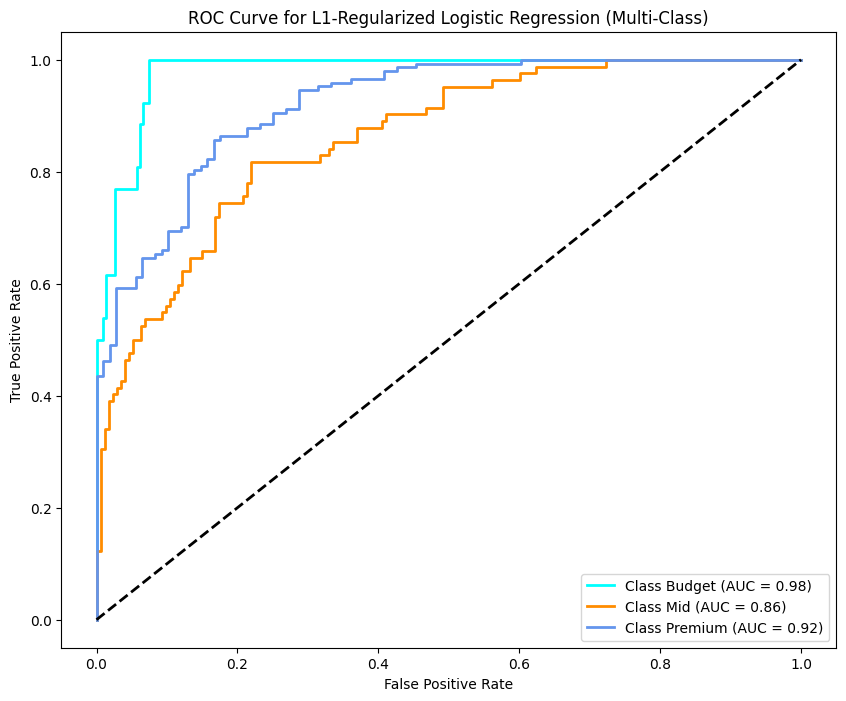

In [ ]:
# 7. Calculate ROC Curve and AUC Scores for L1-Regularized Model
# Binarize the target variable for multi-class AUC
label_encoder = LabelEncoder()
y_val_encoded = label_encoder.fit_transform(y_val)
y_val_bin = label_binarize(y_val_encoded, classes=[0, 1, 2])  # Assuming 4 classes: 0 = Budget, 1 = Mid, 2 = Premium, 3 = Luxury

# Get predicted probabilities for the full validation set using L1 model
y_pred_prob_l1_full = lr_l1.predict_proba(X_val)

# Calculate ROC and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_val_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_prob_l1_full[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
class_names = label_encoder.classes_

for i in fpr.keys():
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2,
             label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for L1-Regularized Logistic Regression (Multi-Class)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 8. 5-Fold Cross Validation for L1-Regularized Logistic Regression
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_auc_scores = []
cv_accuracy_scores = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Train Logistic Regression Model on Each Fold with L1 Regularization
    lr_l1_fold = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', random_state=42)
    lr_l1_fold.fit(X_train_fold, y_train_fold)

    # Predict on Test Fold
    y_pred_fold = lr_l1_fold.predict(X_test_fold)
    y_proba_fold = lr_l1_fold.predict_proba(X_test_fold)

    # Calculate AUC (Macro-Averaged for Multi-Class)
    y_test_bin = label_binarize(label_encoder.transform(y_test_fold), classes=np.unique(y_val_encoded))
    auc_fold = roc_auc_score(y_test_bin, y_proba_fold, average='macro', multi_class='ovr')
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)

    # Append Scores for Each Fold
    cv_auc_scores.append(auc_fold)
    cv_accuracy_scores.append(accuracy_fold)

    print(f"Fold AUC: {auc_fold:.3f}, Fold Accuracy: {accuracy_fold:.3f}")

# Display Average Scores Across Folds for Logistic Regression
print(f"\nAverage AUC from 5-Fold CV: {np.mean(cv_auc_scores):.3f}")
print(f"Average Accuracy from 5-Fold CV: {np.mean(cv_accuracy_scores):.3f}")



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



Fold AUC: 0.935, Fold Accuracy: 0.804


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



Fold AUC: 0.949, Fold Accuracy: 0.827
Fold AUC: 0.935, Fold Accuracy: 0.804


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



Fold AUC: 0.925, Fold Accuracy: 0.804


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



Fold AUC: 0.928, Fold Accuracy: 0.804

Average AUC from 5-Fold CV: 0.934
Average Accuracy from 5-Fold CV: 0.809


In [ ]:
# 9. Feature Importance with L1 Regularization
coefficients_l1 = pd.DataFrame(lr_l1.coef_, columns=X_train.columns, index=label_encoder.classes_)
print("\nNon-zero Coefficients for L1-Regularized Model (Feature Selection):")
for i, row in coefficients_l1.iterrows():
    non_zero_features = row[row != 0].index
    print(f"Selected Features for Class {i}: {non_zero_features.to_list()}")



Non-zero Coefficients for L1-Regularized Model (Feature Selection):
Selected Features for Class Budget: ['Ram', 'Touchscreen', 'IPSpanel', 'CPU_freq', 'OS_Linux', 'OS_No OS', 'OS_Windows 10', 'OS_Windows 7', 'TypeName_2 in 1 Convertible', 'TypeName_Notebook', 'TypeName_Ultrabook', 'Screen_Full HD', 'PrimaryStorageType_Flash Storage', 'PrimaryStorageType_SSD', 'GPU_company_Intel', 'GPU_company_Nvidia', 'CPU_company_Intel', 'Screen_Area', 'Total_Storage']
Selected Features for Class Mid: ['Ram', 'Weight', 'Touchscreen', 'IPSpanel', 'CPU_freq', 'OS_Linux', 'OS_No OS', 'OS_Windows 7', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'Screen_Full HD', 'Screen_Standard', 'PrimaryStorageType_Flash Storage', 'PrimaryStorageType_Hybrid', 'PrimaryStorageType_SSD', 'SecondaryStorageType_HDD', 'GPU_company_Intel', 'GPU_company_Nvidia', 'CPU_company_AMD', 'Screen_Area', 'RAM_CPU_Interaction', 'Total_Storage']
Selected Features for

# RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from scipy.stats import randint

selected_features = [
    'Ram', 'Touchscreen', 'CPU_freq', 'Total_Storage', 'Screen_Area',
    'OS_No OS', 'PrimaryStorageType_SSD', 'TypeName_Notebook',
    'OS_Linux', 'GPU_company_Intel', 'Weight', 'IPSpanel'
]

In [ ]:
X = laptop_prices_processed[selected_features].values
y = laptop_prices_processed['Price_Category']

# Encode target variable (Price_Category) as numeric values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Define hyperparameter distribution for Random Forest tuning
param_dist = {
    'n_estimators': randint(100, 500),         # Number of trees
    'max_depth': [None, 10, 20, 30, 40],      # Maximum depth of trees
    'min_samples_split': randint(2, 20),      # Minimum samples to split
    'min_samples_leaf': randint(1, 10),       # Minimum samples in a leaf
    'bootstrap': [True, False]                # Whether to use bootstrapping
}

# Set up RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                              # Number of random combinations to try
    scoring='accuracy',                     # Use accuracy as the metric
    cv=5,                                   # 5-fold cross-validation
    verbose=2,                              # Detailed output during search
    n_jobs=-1,                              # Use all CPU cores
    random_state=42                         # Ensure reproducibility
)

# Perform randomized search
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Display the best parameters
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 445}


In [ ]:
# Evaluate the best model on validation set
y_pred_val = best_rf_model.predict(X_val)

In [ ]:
# Calculate validation metrics
conf_matrix_val = confusion_matrix(y_val, y_pred_val)

In [ ]:
# Calculate validation metrics
validation_accuracy = accuracy_score(y_val, y_pred_val)
validation_f1_score = f1_score(y_val, y_pred_val, average='weighted')


In [ ]:
# Display Validation Metrics
print("Validation Data Set")
print("Confusion Matrix:\n", conf_matrix_val)
print("Validation Accuracy:", validation_accuracy)
print("Validation F1 Score:", validation_f1_score)

Validation Data Set
Confusion Matrix:
 [[ 16  10   0]
 [  3  65  14]
 [  1  17 129]]
Validation Accuracy: 0.8235294117647058
Validation F1 Score: 0.8240417046378772


In [ ]:
# Calculate and Plot ROC Curve and AUC for Validation Data
# Binarize labels for multi-class AUC calculation
y_val_bin = label_binarize(y_val, classes=np.unique(y_encoded))
y_val_prob = best_rf_model.predict_proba(X_val)

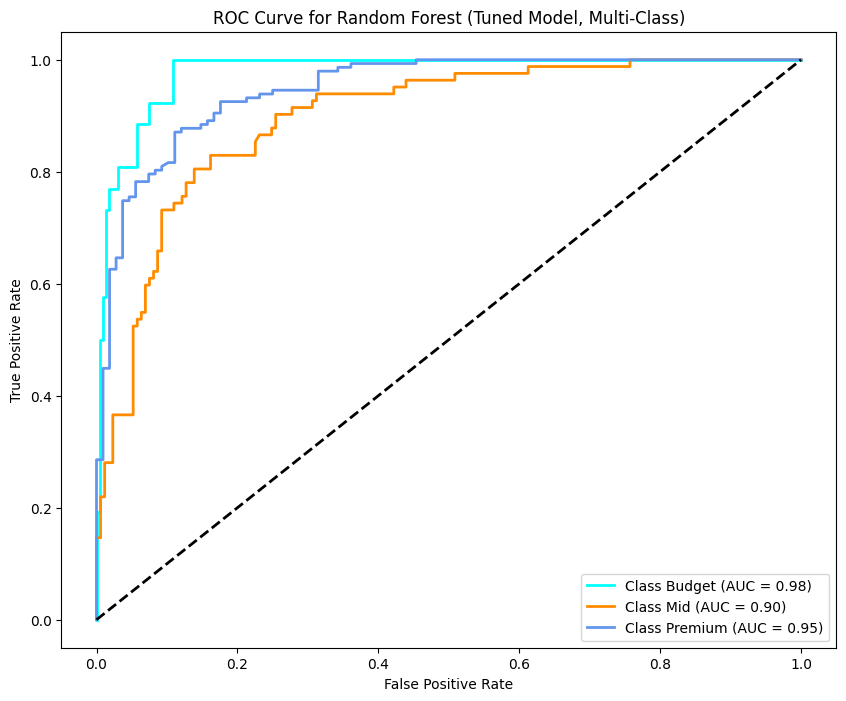

In [ ]:
# Calculate ROC and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_val_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue']
class_names = label_encoder.classes_

for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest (Tuned Model, Multi-Class)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Use 5-Fold Cross Validation for Model Evaluation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_auc_scores = []
cv_accuracy_scores = []

for train_index, test_index in kf.split(X, y_encoded):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y_encoded[train_index], y_encoded[test_index]

    # Train the tuned Random Forest model on each fold
    best_rf_model.fit(X_train_fold, y_train_fold)

    # Predict on the test fold
    y_pred_fold = best_rf_model.predict(X_test_fold)
    y_proba_fold = best_rf_model.predict_proba(X_test_fold)

    # Calculate AUC (Macro-Averaged for Multi-Class)
    y_test_bin = label_binarize(y_test_fold, classes=np.unique(y_encoded))
    auc_fold = roc_auc_score(y_test_bin, y_proba_fold, average='macro', multi_class='ovr')
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)

    # Append scores for each fold
    cv_auc_scores.append(auc_fold)
    cv_accuracy_scores.append(accuracy_fold)

    print(f"Fold AUC: {auc_fold:.3f}, Fold Accuracy: {accuracy_fold:.3f}")

# Display average scores across folds
print(f"\nAverage AUC from 5-Fold CV: {np.mean(cv_auc_scores):.3f}")
print(f"Average Accuracy from 5-Fold CV: {np.mean(cv_accuracy_scores):.3f}")

Fold AUC: 0.953, Fold Accuracy: 0.839
Fold AUC: 0.958, Fold Accuracy: 0.871
Fold AUC: 0.947, Fold Accuracy: 0.847
Fold AUC: 0.942, Fold Accuracy: 0.800
Fold AUC: 0.959, Fold Accuracy: 0.859

Average AUC from 5-Fold CV: 0.952
Average Accuracy from 5-Fold CV: 0.843


# APPENDIX
(CODE FOR OTHER MODELS THAT ARENT USED IN THE MAIN PIPELINE)

# PCA & KMEANS CLUSTERING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# 1. Select Columns for Clustering (Same as used for Random Forest)
selected_columns_rf = [
    'Ram', 'Touchscreen', 'CPU_freq', 'Total_Storage', 'Screen_Area',
    'OS_No OS', 'PrimaryStorageType_SSD', 'TypeName_Notebook',
    'OS_Linux', 'GPU_company_Intel', 'Weight', 'IPSpanel'
]
laptop_data_for_clustering = laptop_prices_processed[selected_columns_rf]

In [ ]:
# 2. Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, n_init=50, random_state=0)
y_kmeans = kmeans.fit_predict(laptop_data_for_clustering)
centroids = kmeans.cluster_centers_

In [ ]:
# 3: Fit PCA Without Specifying the Number of Components
pca = PCA()
pca.fit(laptop_data_for_clustering)

PCA()

In [ ]:
# 4: Calculate the Cumulative Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

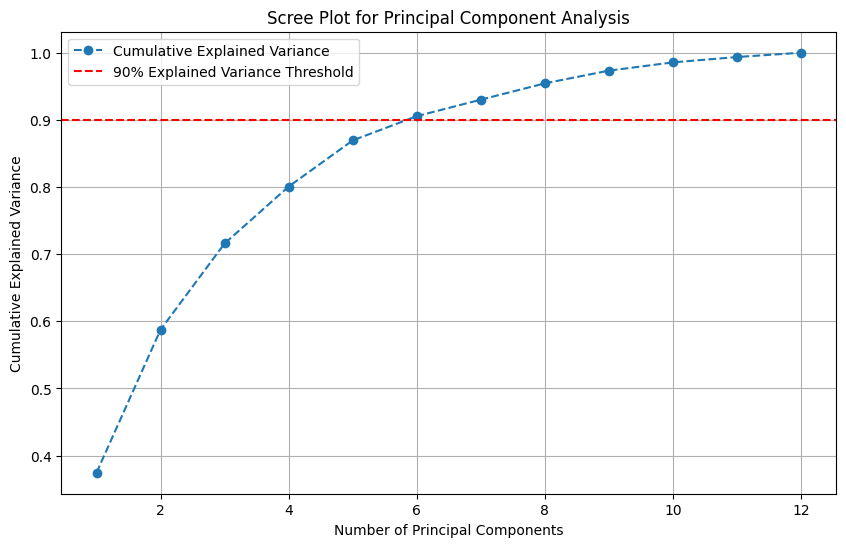

In [ ]:
# 5: Plot the Scree Plot to Identify the Elbow Point
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot for Principal Component Analysis")
plt.axhline(y=0.9, color='red', linestyle='--', label='90% Explained Variance Threshold')  # Optional guide line
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 6. PCA to Reduce Dimensionality to 3 Components for Visualization
pca = PCA(n_components=3)
laptop_pca = pca.fit_transform(laptop_data_for_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



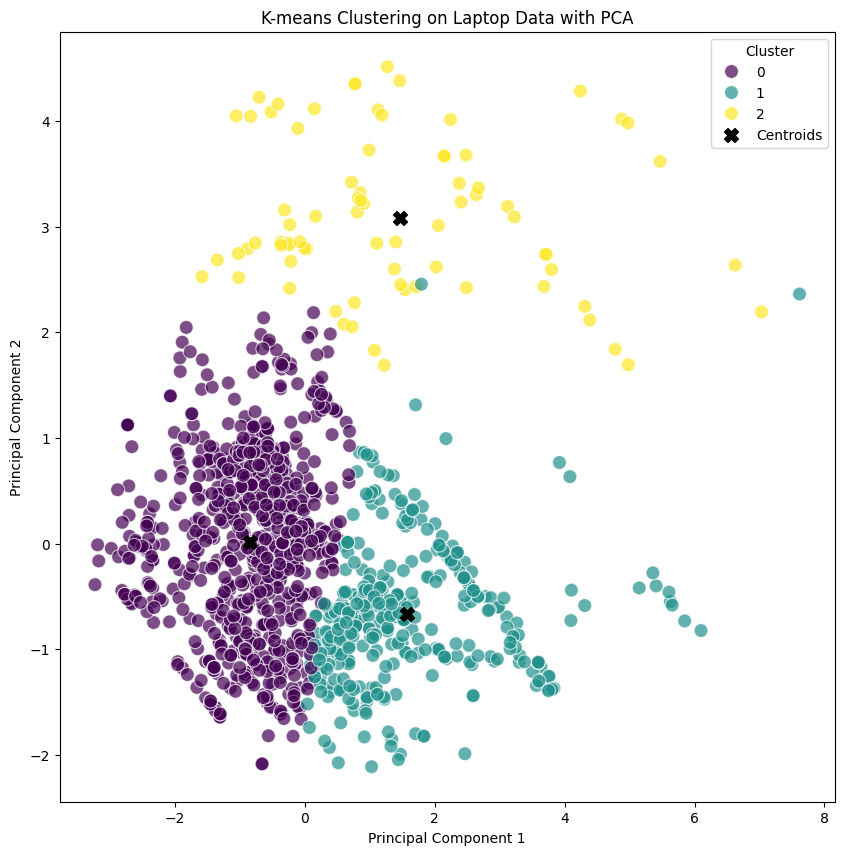

In [ ]:
# 7. Visualize the Clusters in 2D
plt.figure(figsize=(10, 10))
sns.scatterplot(x=laptop_pca[:, 0], y=laptop_pca[:, 1], hue=y_kmeans, palette='viridis', s=100, alpha=0.7)
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], c='black', s=100, marker='X', label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering on Laptop Data with PCA")
plt.legend(title="Cluster")
plt.show()


In [ ]:
# 8. Calculate Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index
sil_score = silhouette_score(laptop_data_for_clustering, y_kmeans)
db_score = davies_bouldin_score(laptop_data_for_clustering, y_kmeans)
ch_score = calinski_harabasz_score(laptop_data_for_clustering, y_kmeans)

print(f'Silhouette Score: {sil_score:.2f}')
print(f'Davies-Bouldin Index: {db_score:.2f}')
print(f'Calinski-Harabasz Index: {ch_score:.2f}')


Silhouette Score: 0.27
Davies-Bouldin Index: 1.35
Calinski-Harabasz Index: 349.45


In [ ]:
# 9. Analyze the Clusters
# Adding the cluster labels to the original DataFrame
laptop_prices_processed['Cluster'] = y_kmeans

In [ ]:
# Check Price_Category distribution in each cluster
cluster_price_summary = laptop_prices_processed.groupby(['Cluster', 'Price_Category']).size().unstack().fillna(0)
print("\nPrice Category Distribution in Each Cluster:")
print(cluster_price_summary)



Price Category Distribution in Each Cluster:
Price_Category  Budget  Mid  Premium
Cluster                             
0                  165  289      372
1                    8  117      247
2                    0    0       77


<ipython-input-71-e4a1c48392c8>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



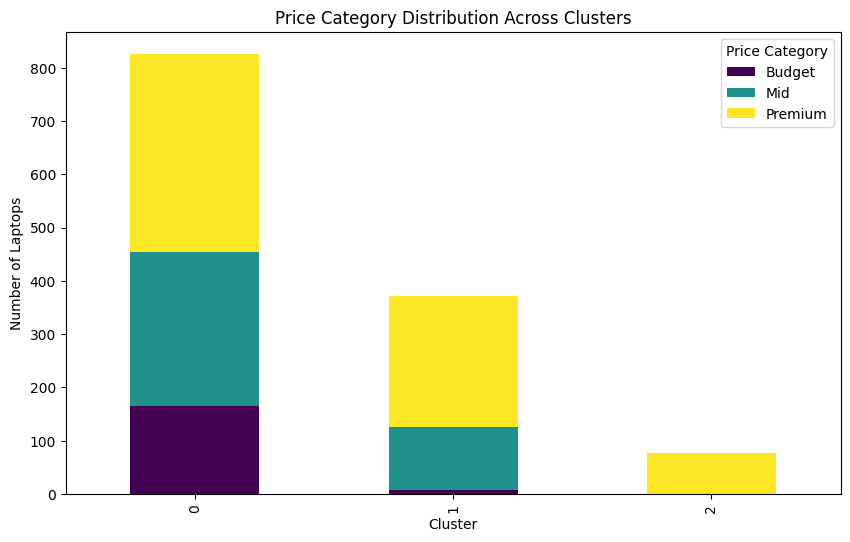

In [ ]:
# Visualize Price Category Distribution within Clusters
cluster_price_summary.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Price Category Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Laptops')
plt.legend(title='Price Category')
plt.show()


In [ ]:
# 10. Convert centroids back to the original feature space
centroids_df = pd.DataFrame(centroids, columns=selected_columns_rf)
print("\nCluster Centers in Original Feature Space:")
print(centroids_df)


Cluster Centers in Original Feature Space:
        Ram  Touchscreen  CPU_freq  Total_Storage  Screen_Area  OS_No OS  \
0 -0.380146     0.152542 -0.281149      -0.492730    -0.252481  0.054479   
1  0.598229     0.040323  0.584933       1.059402    -0.153600  0.056452   
2  1.187784     0.610390  0.190055       0.167496     3.450500  0.000000   

   PrimaryStorageType_SSD  TypeName_Notebook  OS_Linux  GPU_company_Intel  \
0                0.644068           0.639225  0.048426           0.761501   
1                0.615591           0.446237  0.045699           0.080645   
2                0.987013           0.168831  0.012987           0.584416   

     Weight  IPSpanel  
0 -0.387185  0.251816  
1  0.920963  0.301075  
2 -0.295886  0.480519  


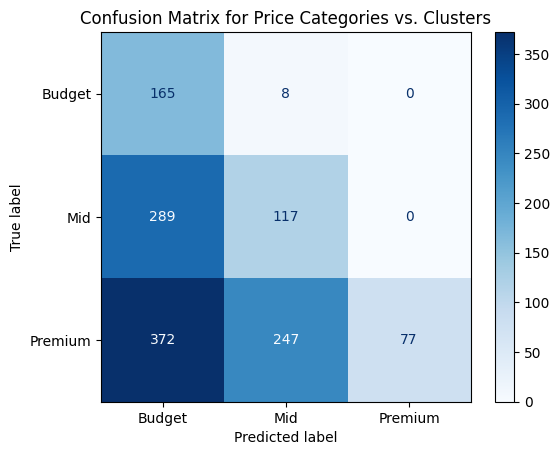

In [ ]:
# 11. Confusion Matrix to See How Well the Price Categories Align with Clusters

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_true = label_encoder.fit_transform(laptop_prices_processed['Price_Category'])

cm = confusion_matrix(y_true, y_kmeans)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Price Categories vs. Clusters')
plt.show()

# NEURAL NETWORKS


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data Preparation
selected_features = [
    'Ram', 'Touchscreen', 'CPU_freq', 'Total_Storage', 'Screen_Area',
    'OS_No OS', 'PrimaryStorageType_SSD', 'TypeName_Notebook',
    'OS_Linux', 'GPU_company_Intel', 'Weight', 'IPSpanel'
]

# Assuming laptop_prices_processed is your DataFrame
X = laptop_prices_processed[selected_features]
y = laptop_prices_processed['Price_Category']

# Encode target variable (Price_Category) as numeric values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=123, stratify=y_encoded)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=123, stratify=y_temp)


In [ ]:
# Neural Network Model
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def int_to_onehot(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary

class NeuralNetMLP:
    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        super().__init__()
        self.num_classes = num_classes

        # Weight initialization using Xavier initialization
        rng = np.random.RandomState(random_seed)
        self.weight_h = rng.uniform(
            -np.sqrt(6. / (num_features + num_hidden)),
            np.sqrt(6. / (num_features + num_hidden)),
            (num_hidden, num_features))
        self.bias_h = np.zeros(num_hidden)

        self.weight_out = rng.uniform(
            -np.sqrt(6. / (num_hidden + num_classes)),
            np.sqrt(6. / (num_hidden + num_classes)),
            (num_classes, num_hidden))
        self.bias_out = np.zeros(num_classes)

    def forward(self, x):
        # Hidden layer
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = np.maximum(0, z_h)  # ReLU activation

        # Output layer
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = softmax(z_out)  # Softmax activation for output layer
        return a_h, a_out

    def backward(self, x, a_h, a_out, y):
        y_onehot = int_to_onehot(y, self.num_classes)
        d_loss__d_a_out = (a_out - y_onehot) / y.shape[0]

        d_a_out__d_z_out = a_out * (1 - a_out)
        delta_out = d_loss__d_a_out * d_a_out__d_z_out

        d_z_out__dw_out = a_h
        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)
        d_loss__db_out = np.sum(delta_out, axis=0)

        d_z_out__a_h = self.weight_out
        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)

        d_a_h__d_z_h = np.where(a_h > 0, 1, 0)
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, x)
        d_loss__d_b_h = np.sum(d_loss__a_h * d_a_h__d_z_h, axis=0)

        return d_loss__dw_out, d_loss__db_out, d_loss__d_w_h, d_loss__d_b_h



In [ ]:
# Training
def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    for start_idx in range(0, indices.shape[0] - minibatch_size + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]
        yield X[batch_idx], y[batch_idx]


In [ ]:
def compute_mse_and_acc(nnet, X, y, num_labels=3, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)
    for i, (features, targets) in enumerate(minibatch_gen):
        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=1)
        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()
        num_examples += targets.shape[0]
        mse += loss
    mse = mse/(i+1)
    acc = correct_pred/num_examples
    return mse, acc


In [ ]:
def train(model, X_train, y_train, X_valid, y_valid, num_epochs, learning_rate):
    epoch_loss, epoch_train_acc, epoch_valid_acc = [], [], []
    for e in range(num_epochs):
        minibatch_gen = minibatch_generator(X_train, y_train, minibatch_size)
        for X_train_mini, y_train_mini in minibatch_gen:
            a_h, a_out = model.forward(X_train_mini)
            d_loss__d_w_out, d_loss__d_b_out, d_loss__d_w_h, d_loss__d_b_h = model.backward(X_train_mini, a_h, a_out, y_train_mini)

            # Update weights
            model.weight_h -= learning_rate * d_loss__d_w_h
            model.bias_h -= learning_rate * d_loss__d_b_h
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out

        train_mse, train_acc = compute_mse_and_acc(model, X_train, y_train)
        valid_mse, valid_acc = compute_mse_and_acc(model, X_valid, y_valid)
        train_acc, valid_acc = train_acc*100, valid_acc*100

        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        epoch_loss.append(train_mse)

        print(f'Epoch: {e+1:03d}/{num_epochs:03d} | Train MSE: {train_mse:.2f} | Train Acc: {train_acc:.2f}% | Valid Acc: {valid_acc:.2f}%')

    return epoch_loss, epoch_train_acc, epoch_valid_acc


In [ ]:
# Hyperparameter tuning for learning rates
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]
learning_rate_results = {}

num_epochs = 50
minibatch_size = 100

for lr in learning_rates:
    print(f"Testing learning rate: {lr}")
    model = NeuralNetMLP(num_features=X_train.shape[1], num_hidden=50, num_classes=3)
    np.random.seed(123)

    _, _, epoch_valid_acc = train(model, X_train, y_train, X_valid, y_valid, num_epochs=num_epochs, learning_rate=lr)

    final_valid_acc = epoch_valid_acc[-1]
    learning_rate_results[lr] = final_valid_acc
    print(f"Learning Rate: {lr} | Validation Accuracy: {final_valid_acc:.2f}%")

best_learning_rate = max(learning_rate_results, key=learning_rate_results.get)
print(f"\nBest Learning Rate: {best_learning_rate} with Validation Accuracy: {learning_rate_results[best_learning_rate]:.2f}%")

Testing learning rate: 0.001
Epoch: 001/050 | Train MSE: 0.24 | Train Acc: 30.38% | Valid Acc: 29.50%
Epoch: 002/050 | Train MSE: 0.24 | Train Acc: 30.63% | Valid Acc: 30.00%
Epoch: 003/050 | Train MSE: 0.24 | Train Acc: 30.88% | Valid Acc: 29.50%
Epoch: 004/050 | Train MSE: 0.24 | Train Acc: 30.75% | Valid Acc: 30.00%
Epoch: 005/050 | Train MSE: 0.24 | Train Acc: 30.75% | Valid Acc: 31.00%
Epoch: 006/050 | Train MSE: 0.24 | Train Acc: 31.13% | Valid Acc: 31.00%
Epoch: 007/050 | Train MSE: 0.24 | Train Acc: 30.63% | Valid Acc: 31.50%
Epoch: 008/050 | Train MSE: 0.24 | Train Acc: 31.25% | Valid Acc: 32.00%
Epoch: 009/050 | Train MSE: 0.24 | Train Acc: 32.62% | Valid Acc: 33.00%
Epoch: 010/050 | Train MSE: 0.24 | Train Acc: 32.12% | Valid Acc: 33.00%
Epoch: 011/050 | Train MSE: 0.24 | Train Acc: 32.38% | Valid Acc: 32.50%
Epoch: 012/050 | Train MSE: 0.24 | Train Acc: 32.62% | Valid Acc: 32.50%
Epoch: 013/050 | Train MSE: 0.24 | Train Acc: 32.62% | Valid Acc: 34.00%
Epoch: 014/050 | Train

In [ ]:
# Train final model with the best learning rate
print(f"\nTraining final model with the best learning rate: {best_learning_rate}")
final_model = NeuralNetMLP(num_features=X_train.shape[1], num_hidden=50, num_classes=3)
np.random.seed(123)
final_loss, final_train_acc, final_valid_acc = train(final_model, X_train, y_train, X_valid, y_valid, num_epochs=num_epochs, learning_rate=best_learning_rate)


Training final model with the best learning rate: 0.5
Epoch: 001/050 | Train MSE: 0.15 | Train Acc: 63.50% | Valid Acc: 59.00%
Epoch: 002/050 | Train MSE: 0.13 | Train Acc: 72.88% | Valid Acc: 67.00%
Epoch: 003/050 | Train MSE: 0.12 | Train Acc: 75.12% | Valid Acc: 71.50%
Epoch: 004/050 | Train MSE: 0.11 | Train Acc: 77.75% | Valid Acc: 73.50%
Epoch: 005/050 | Train MSE: 0.11 | Train Acc: 78.50% | Valid Acc: 74.00%
Epoch: 006/050 | Train MSE: 0.10 | Train Acc: 79.38% | Valid Acc: 77.00%
Epoch: 007/050 | Train MSE: 0.10 | Train Acc: 79.38% | Valid Acc: 77.50%
Epoch: 008/050 | Train MSE: 0.10 | Train Acc: 80.88% | Valid Acc: 77.50%
Epoch: 009/050 | Train MSE: 0.09 | Train Acc: 80.62% | Valid Acc: 78.50%
Epoch: 010/050 | Train MSE: 0.09 | Train Acc: 81.12% | Valid Acc: 79.00%
Epoch: 011/050 | Train MSE: 0.09 | Train Acc: 81.12% | Valid Acc: 78.00%
Epoch: 012/050 | Train MSE: 0.09 | Train Acc: 81.88% | Valid Acc: 79.50%
Epoch: 013/050 | Train MSE: 0.09 | Train Acc: 81.62% | Valid Acc: 79.

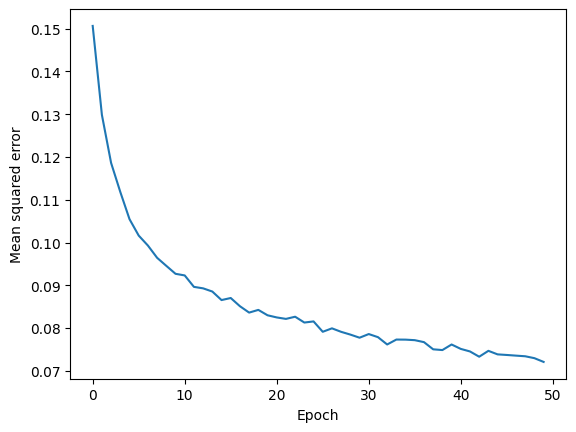

In [ ]:
# Plot Training Loss
plt.plot(range(len(final_loss)), final_loss)
plt.ylabel('Mean squared error')
plt.xlabel('Epoch')
plt.show()

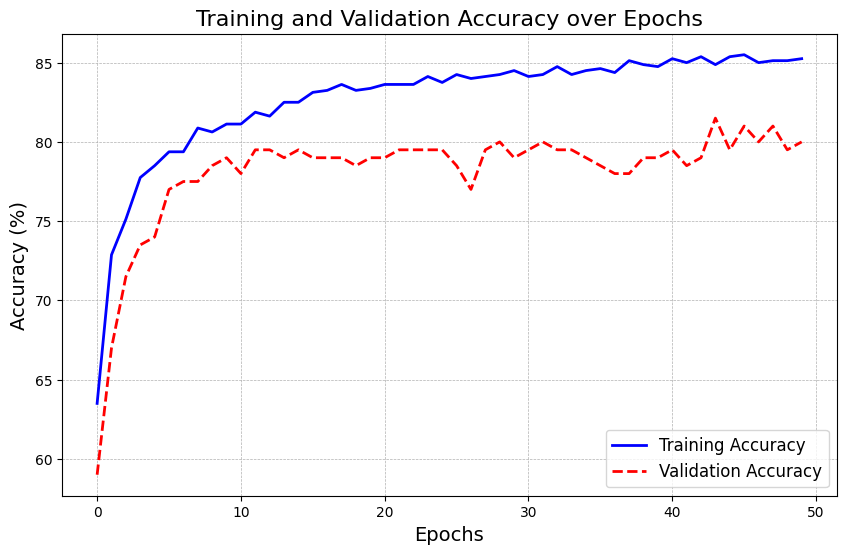

In [ ]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(len(final_train_acc)), final_train_acc, label='Training Accuracy', color='b', linestyle='-', linewidth=2)
plt.plot(range(len(final_valid_acc)), final_valid_acc, label='Validation Accuracy', color='r', linestyle='--', linewidth=2)

plt.ylabel('Accuracy (%)', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.title('Training and Validation Accuracy over Epochs', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
# Evaluation on Test Set
test_mse, test_acc = compute_mse_and_acc(final_model, X_test, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')

Test accuracy: 81.00%
